I will be creating an Object Classifier.

I tried to make classifier on Objects. I may not be perfect at it but I assure you I will try my best. Yesterday's webinar was a great session. It doesn't matters whether i will be getting the certitificate or not.. I am just happy atleast I tried. Thank You for giving me such Oppurtunity.

In [92]:
!pip install fastai --upgrade --quiet

In [94]:
from fastai.vision.all import *

In [95]:
path = Path('data')
path.mkdir(exist_ok=True)

Now i will be adding objects data

In [97]:
!wget -q https://raw.githubusercontent.com/pulkit2204/Object-Classifier/main/jug.txt?token=ALK5TDQ52EXJ3UDA45EEEMS7T7JB4
!wget -q https://raw.githubusercontent.com/pulkit2204/Object-Classifier/main/spoon.txt?token=ALK5TDXXFYY5ZH6PN2B43FC7T7JDY

Once we have all the URLs, we can easily download them using download_images function.

In [99]:
download_images('data/jug', Path('jug.txt?token=ALK5TDQ52EXJ3UDA45EEEMS7T7JB4'))
download_images('data/spoon', Path('spoon.txt?token=ALK5TDXXFYY5ZH6PN2B43FC7T7JDY'))

In [100]:
files = get_image_files(path)
len(files)

31

In [101]:
failed = verify_images(files)
failed

(#0) []

In [102]:
failed.map(Path.unlink) # delete corrupted files

(#0) []

In [103]:
files = get_image_files(path)
len(files)

31

Now i will be creating my own data loader

In [104]:
object = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # x,y
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

Telling fastai about the actual source of data

In [106]:
dls = object.dataloaders(path)

In [109]:
dls.train.show_batch(max_n=4, nrows=1)

ValueError: ignored

Creating my own Learner

In [111]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,nan,3.042867,1.000000,00:01


/usr/local/lib/python3.6/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,error_rate,time
0,nan,3.042867,1.000000,00:01
1,nan,3.042867,1.000000,00:01
2,nan,3.042867,1.000000,00:01
3,nan,3.042867,1.000000,00:01
4,nan,3.042867,1.000000,00:01
5,nan,3.042867,1.000000,00:01
6,nan,3.042867,1.000000,00:01
7,nan,3.042867,1.000000,00:01
8,nan,3.042867,1.000000,00:01
9,nan,3.042867,1.000000,00:01


In [114]:
learn.predict(files[4])

('spoon', tensor(1), tensor([0.1691, 0.8309]))

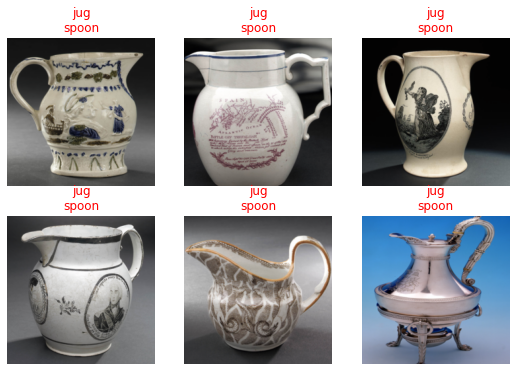

In [117]:
learn.show_results()

Inference

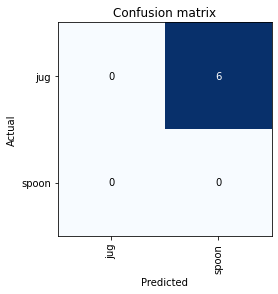

In [118]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Deploying Model

In [119]:
learn.export('export.pkl')

In [129]:
!pip install streamlit --quiet
!pip install colab-everything --quiet

In [130]:
!wget -q https://raw.githubusercontent.com/pulkit2204/Object-Classifier/main/app.py?token=ALK5TDSESRH2EKRNB265Z6K7T7F5G

In [ ]:
from colab_everything import ColabStreamlit
ColabStreamlit('app.py')

Web App can be accessed on: https://bc5005bef7b1.ngrok.io

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:9999
  External URL: http://35.237.171.183:9999



t=2020-10-26T09:38:15+0000 lvl=warn msg="failed to open private leg" id=7d6bf8dfe0ee privaddr=localhost:80 err="dial tcp 127.0.0.1:80: connect: connection refused"
t=2020-10-26T09:38:17+0000 lvl=warn msg="failed to open private leg" id=c2c3378c7882 privaddr=localhost:80 err="dial tcp 127.0.0.1:80: connect: connection refused"
